# Project: House Price Prediction Model

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor

C:\Users\Abubakar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r'C:\Users\Abubakar\OneDrive\Desktop\HousePricePredictionProject.csv')

df=pd.DataFrame(data=df)
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


# Step 1: Data Preprocessing

In [3]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


# Step 2: Exploratory Data Analysis

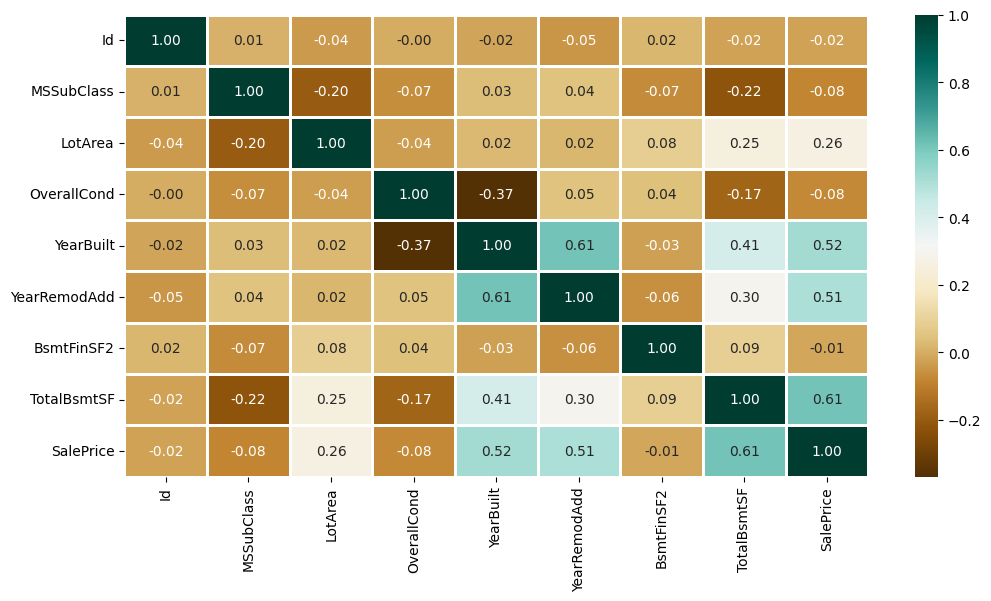

In [4]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

plt.show()

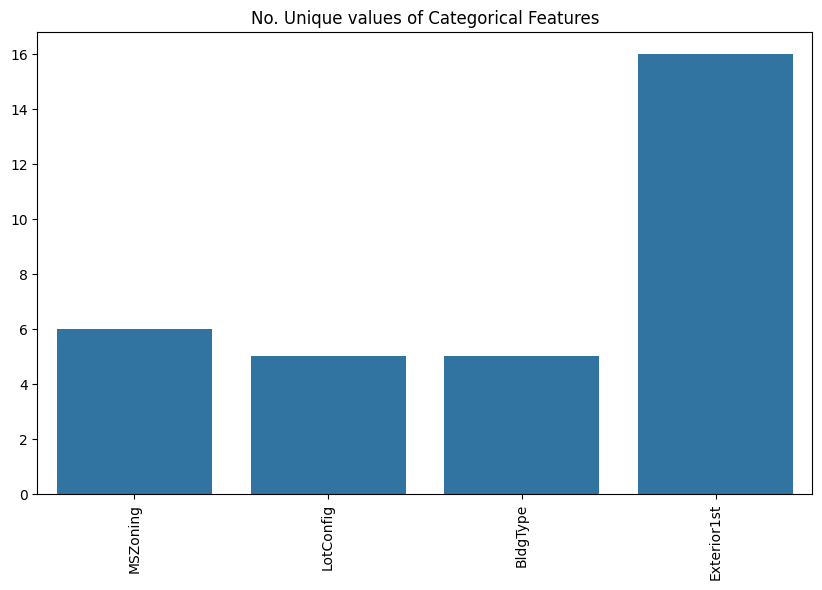

In [5]:
unique_values = []
for col in object_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

plt.show()

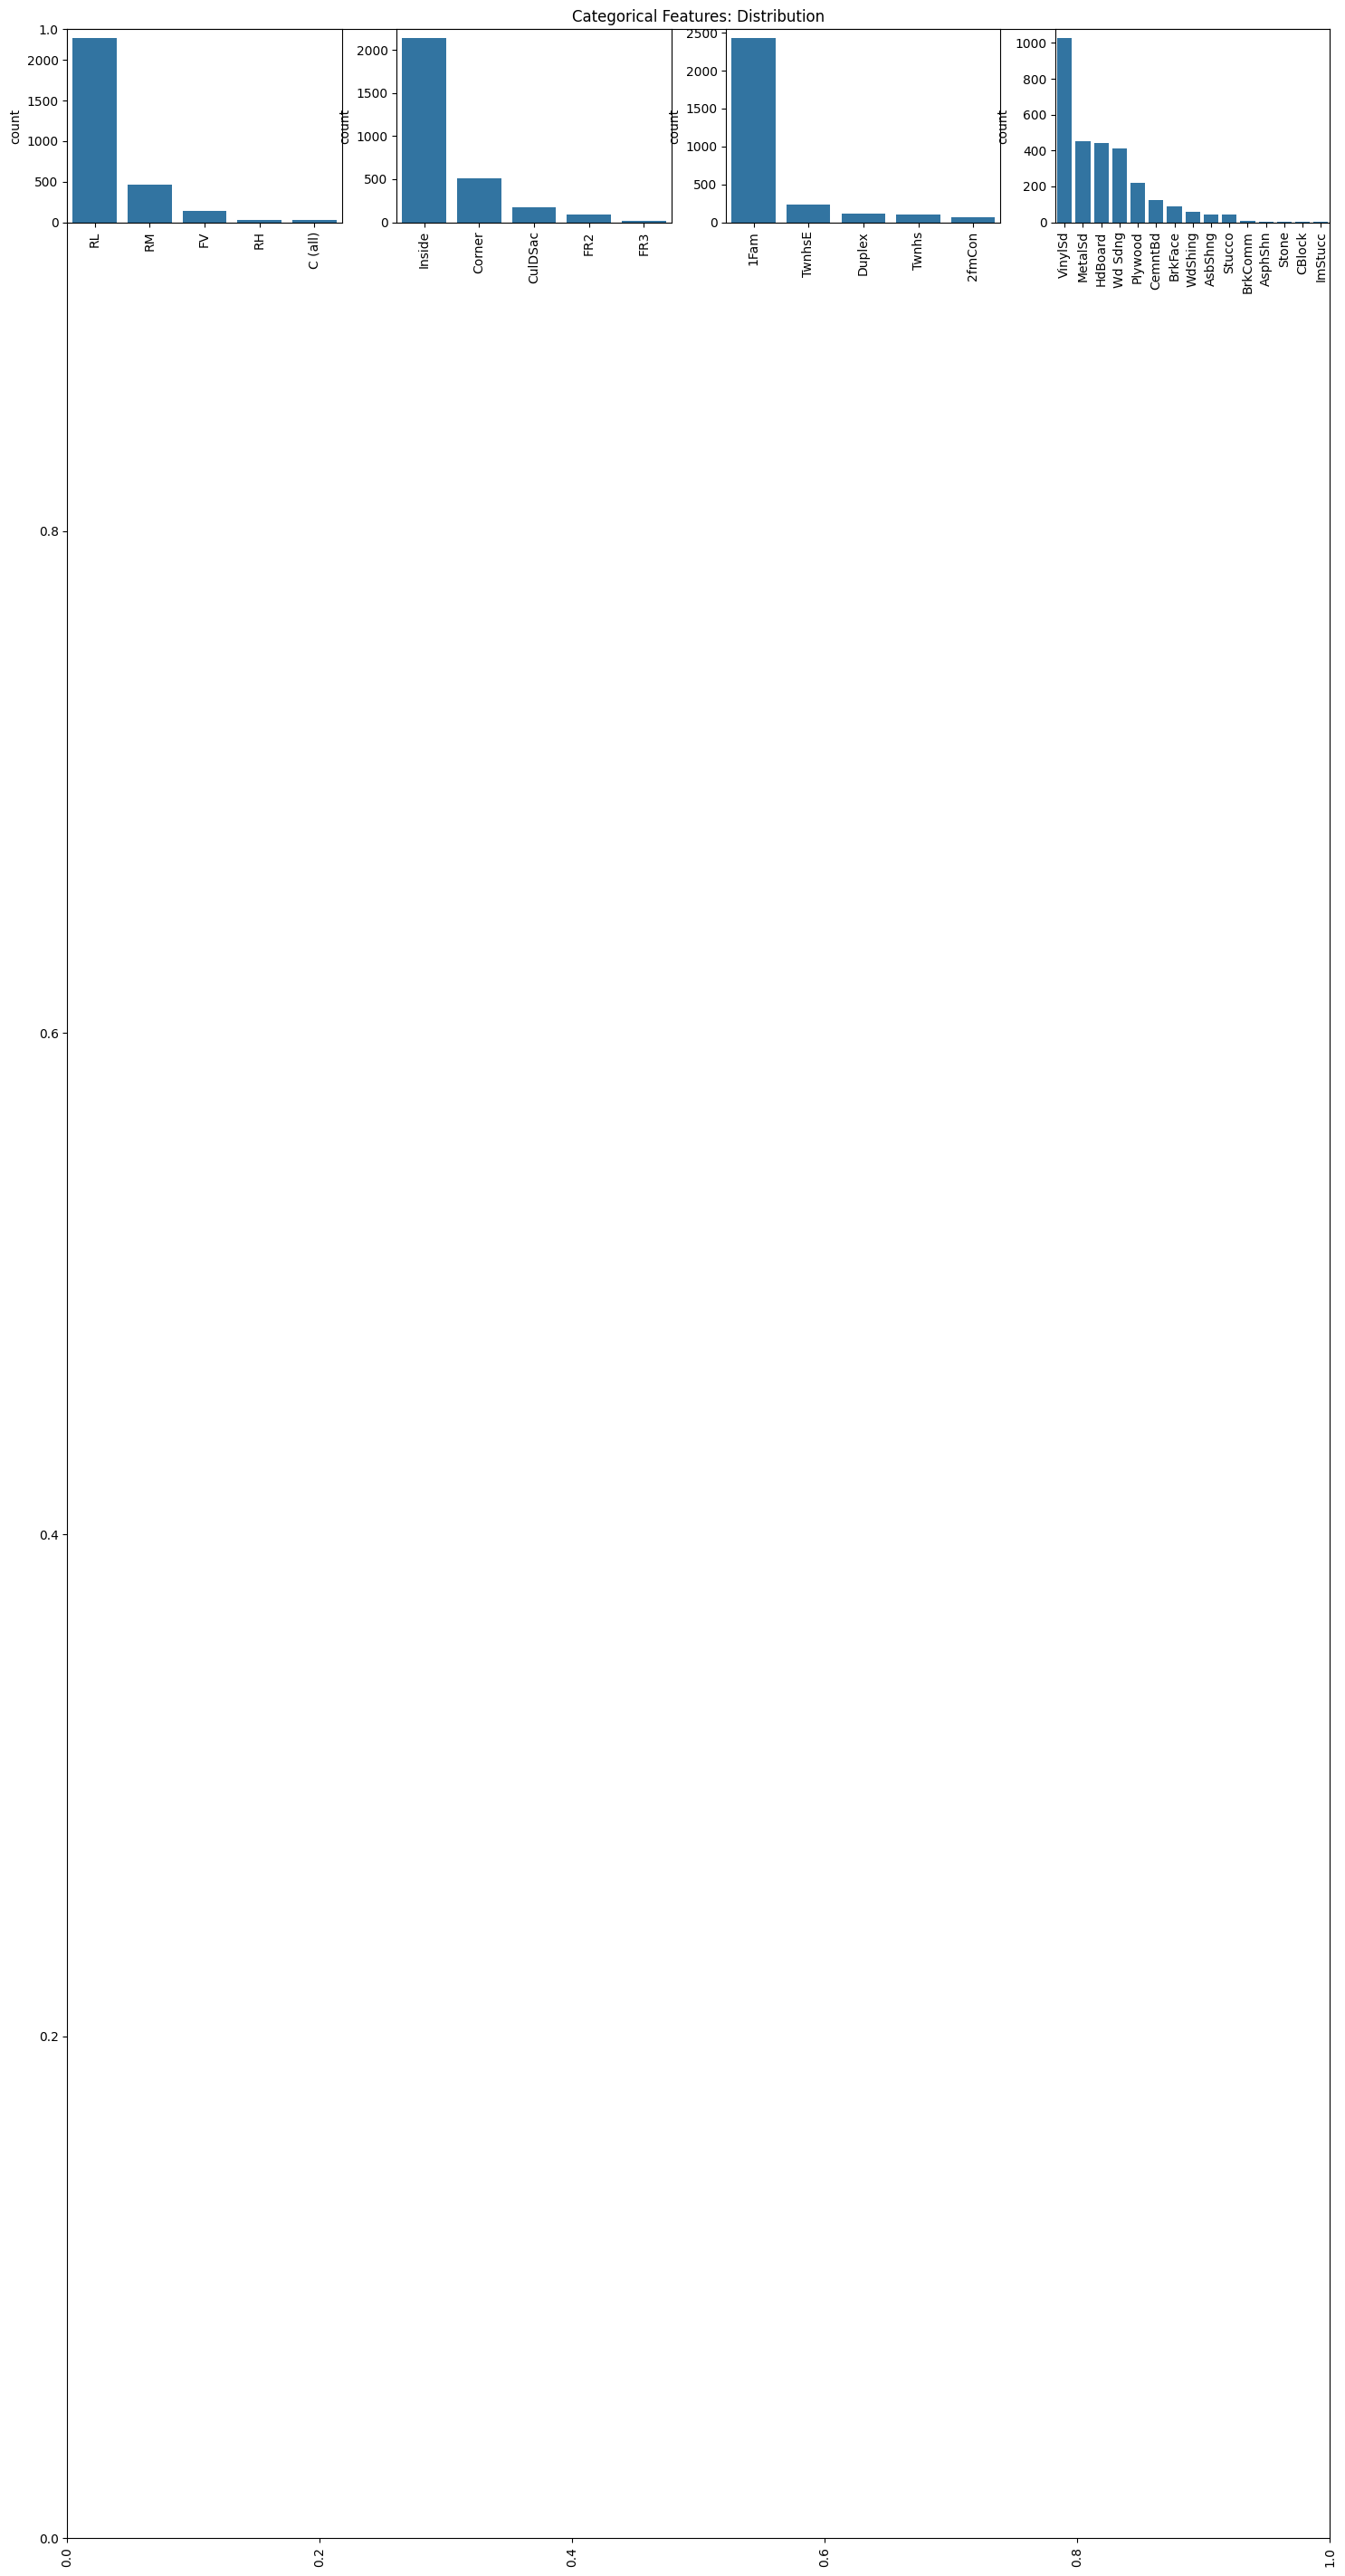

In [6]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

# Data Cleaning

In [7]:
df.drop(['Id'],axis=1,inplace=True)

In [8]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

In [9]:
new_df = df.dropna()

In [10]:
new_df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# OneHotEncoder – For Label categorical features

In [11]:
from sklearn.preprocessing import OneHotEncoder

s = (new_df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [13]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_df[object_cols]))
OH_cols.index = new_df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# Splitting Dataset into Training and Testing

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=42)

# Model and Accuracy

# SVM – Support vector Machine

In [22]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.20686498946192633


# Random Forest Regression

In [23]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.20677182056597235

# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.20023501039964575


# CatBoost Classifier

In [25]:
# This code is contributed by @amartajisce
# import catboost
# Importing CatBoost library
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

Learning rate set to 0.046797
0:	learn: 54451.0354234	total: 1.32ms	remaining: 1.32s
1:	learn: 53799.7112785	total: 2.64ms	remaining: 1.32s
2:	learn: 53086.9046276	total: 4.06ms	remaining: 1.35s
3:	learn: 52470.6198070	total: 5.47ms	remaining: 1.36s
4:	learn: 51908.2401476	total: 6.65ms	remaining: 1.32s
5:	learn: 51418.1106857	total: 7.8ms	remaining: 1.29s
6:	learn: 50953.4510564	total: 9.03ms	remaining: 1.28s
7:	learn: 50519.3935894	total: 10.2ms	remaining: 1.27s
8:	learn: 50036.0213517	total: 11.4ms	remaining: 1.26s
9:	learn: 49585.6242739	total: 12.6ms	remaining: 1.24s
10:	learn: 49176.6864926	total: 13.9ms	remaining: 1.25s
11:	learn: 48840.8360209	total: 15ms	remaining: 1.24s
12:	learn: 48476.7140923	total: 16.2ms	remaining: 1.23s
13:	learn: 48153.4135173	total: 17.3ms	remaining: 1.22s
14:	learn: 47830.5539567	total: 18.7ms	remaining: 1.23s
15:	learn: 47486.7172574	total: 20ms	remaining: 1.23s
16:	learn: 47208.3821153	total: 21.3ms	remaining: 1.23s
17:	learn: 46960.4113154	total: 2

0.48309053213442243